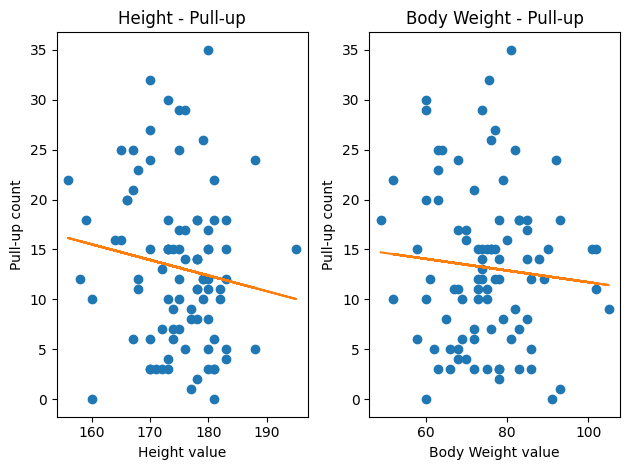

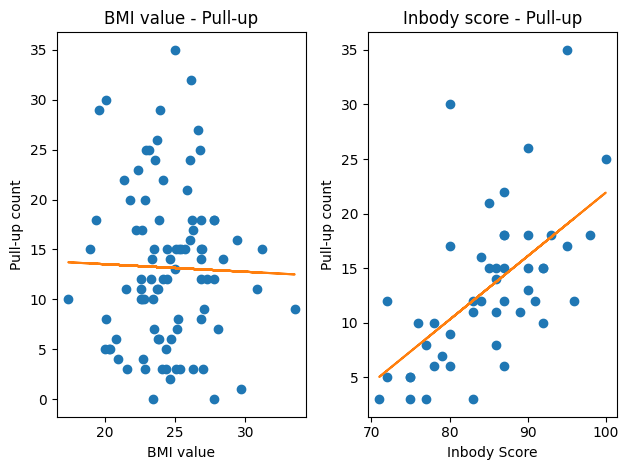

BMI coefficient 값: -0.026805886258021144
인바디 coefficient 값: 0.5928123620561979
키 coefficient 값: -0.1346344754997576
몸무게 coefficient 값: -0.08308139111586224

BMI 스탠다드 에러: 7.978728808288337
인바디 점수 스탠다드 에러: 5.704101222240578
키 스탠다드 에러: 7.9089271398375525
몸무게 스탠다드 에러: 7.9540026775772015


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def sig(x) :
    return np.sum(x)

x= np.squeeze([pd.read_excel(io='puData.xlsx',usecols='E')]) #BMI지수
xh= np.squeeze([pd.read_excel(io='puData.xlsx',usecols='C')])#키
xw= np.squeeze([pd.read_excel(io='puData.xlsx',usecols='D')])#몸무게
y= np.squeeze([pd.read_excel(io='puData.xlsx',usecols='G')]) #턱걸이 횟수

xic=np.squeeze([pd.read_excel(io='puData.xlsx',usecols='F',nrows=48)]) #48행까지 데이터는 인바디점수가 수집됨
yic= np.squeeze([pd.read_excel(io='puData.xlsx',usecols='G',nrows=48)])

n=len(x) #데이터 개수 (인바디점수가 없는데이터)
nic=len(xic) # 인바디점수 포함된 데이터

#회귀 계수 계산식
a1= (n*sig(x*y)-sig(x)*sig(y))/(n*sig(x**2)-((sig(x))**2))  #BMI
a0= (sig(y)-a1*sig(x))/n #BMI
yy= a0+a1*x #BMI

ah1= (n*sig(xh*y)-sig(xh)*sig(y))/(n*sig(xh**2)-((sig(xh))**2))  #키
ah0= (sig(y)-ah1*sig(xh))/n #키
yyh= ah0+ah1*xh #키

aw1= (n*sig(xw*y)-sig(xw)*sig(y))/(n*sig(xw**2)-((sig(xw))**2))  #몸무게
aw0= (sig(y)-aw1*sig(xw))/n #몸무게
yyw= aw0+aw1*xw #몸무게

aa1= (nic*sig(xic*yic)-sig(xic)*sig(yic))/(nic*sig(xic**2)-((sig(xic))**2))
aa0= (sig(yic)-aa1*sig(xic))/nic
yyic= aa0+aa1*xic


#그래프 표현
plt.subplot(1,2,1)
plt.plot(xh,y,'o')
plt.plot(xh,yyh)
plt.xlabel('Height value')
plt.ylabel('Pull-up count')
plt.title('Height - Pull-up')

plt.subplot(1,2,2)
plt.plot(xw,y,'o')
plt.plot(xw,yyw)
plt.xlabel('Body Weight value')
plt.ylabel('Pull-up count')
plt.title('Body Weight - Pull-up')
plt.tight_layout()
plt.show()

plt.subplot(1,2,1)
plt.plot(x,y,'o')
plt.plot(x,yy)
plt.xlabel('BMI value')
plt.ylabel('Pull-up count')
plt.title('BMI value - Pull-up')

plt.subplot(1,2,2)
plt.plot(xic,yic,'o')
plt.plot(xic,yyic)
plt.xlabel('Inbody Score')
plt.ylabel('Pull-up count')
plt.title('Inbody score - Pull-up')
plt.tight_layout()
plt.show()

#상관계수(coefficient) 계산식 
r=(n*sig(x*y)-(sig(x)*sig(y)))/((np.sqrt(n*sig(x**2)-(sig(x))**2))*(np.sqrt((n*sig(y**2))-((sig(y))**2))))
print("BMI coefficient 값:",r)

kk=np.corrcoef(xic,yic)[0,1] #상관계수 계산 라이브러리 사용
print("인바디 coefficient 값:",kk)

kkh=np.corrcoef(xh,y)[0,1]
print("키 coefficient 값:",kkh)

kkw=np.corrcoef(xw,y)[0,1]
print("몸무게 coefficient 값:",kkw)
print('')

#표준오차 계산
Sr= sig((y-a0-a1*x)**2) #BMI
se=standarderror=np.sqrt(Sr/(n-2))

Srh= sig((y-ah0-ah1*xh)**2)#키
seh=standarderror=np.sqrt(Srh/(n-2))

Srw= sig((y-aw0-aw1*xw)**2)#몸무게
sew=standarderror=np.sqrt(Srw/(n-2))
 
Sric= sig((yic-aa0-aa1*xic)**2)#인바디 점수
seic=standarderror=np.sqrt(Sric/(nic-2)) 

print("BMI 스탠다드 에러:",se)
print("인바디 점수 스탠다드 에러:",seic)
print("키 스탠다드 에러:",seh)
print("몸무게 스탠다드 에러:",sew)
